# Exemple PT1 Profes, orientatiu.

## Pregunta 1. Importació del dataset.

### 1.1 On obtenir el dataset. 
Dataset:
https://analisi.transparenciacatalunya.cat/Salut/COVID-19-Seq-enciaci-de-variants/k4w3-3i4f

Instrucció prèvia, per reduir tamany del CSV (recomanable no tenir més de 4000 files), només volem els del 2022.
```bash
cat seqvariants.csv | tail -n+2 | grep -E ',2022,' seqvariants.csv > seqvariants2022.csv
```

Alternatives:
- grep per comarques.
- head -4k > seqvariants.csv > seqvariants_first4k.csv

### 1.2 Descripció
Les dades publicades en aquest conjunt provenen del nou Sistema de Vigilància d’Infeccions de Catalunya (SIVIC), del Departament de Salut, que integra les funcions de vigilància epidemiològica de la grip, de la COVID-19 i d’altres virus respiratoris, amb l'objectiu de monitorar aquests virus, recollir els canvis de tendència i millorar la caracterització microbiològica dels virus circulants.

### 1.3 Nom de les columnes, descripció i tipus.
setmana_epidemiologica	Text Pla        Observacions
any		                Nombre          
data_inici		        Data & Temps    Podem usar-lo a la consulta 7.
data_final		        Data & Temps
codi_regio		        Text Pla        Id Regio (comarca)
nom_regio		        Text Pla        Nom Regio (comarca)
codi_ambit		        Text Pla
nom_ambit		        Text Pla
variant		            Text Pla
sexe		            Text Pla        Gènere. Pot ser categòric.
grup_edat		        Text Pla        Pot ser categòric.
index_socioeconomic		Text Pla        Pot ser categòric.
recompte		        Nombre


In [57]:
# Imports
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import copy

# Q1 - Llegim el CSV.
csv_file_path = 'seqvariants2022.csv'
df_seqvariants_covid: pd.DataFrame = pd.read_csv(csv_file_path, sep=",", parse_dates=['data_inici', 'data_final'], dayfirst=True)
df_seqvariants_covid.head(20)

,setmana_epidemiologica,any,data_inici,data_final,codi_regio,nom_regio,codi_ambit,nom_ambit,variant,sexe,grup_edat,index_socioeconomic,recompte
0,28,2022,2022-07-11,2022-07-17,78,BARCELONA,7803,BARCELONA CIUTAT,Omicron (BA.4),Dona,15 a 44,4,1.0
1,28,2022,2022-07-11,2022-07-17,78,BARCELONA,7803,BARCELONA CIUTAT,Omicron (BA.4),Home,80 o més,2,1.0
2,28,2022,2022-07-11,2022-07-17,78,BARCELONA,7803,BARCELONA CIUTAT,Omicron (BA.5),Dona,70 a 79,4,1.0
3,28,2022,2022-07-11,2022-07-17,78,BARCELONA,7803,BARCELONA CIUTAT,Omicron (BA.5),Dona,80 o més,4,2.0
4,28,2022,2022-07-11,2022-07-17,78,BARCELONA,7803,BARCELONA CIUTAT,Omicron (BA.5),Home,70 a 79,4,1.0
5,27,2022,2022-07-04,2022-07-10,78,BARCELONA,7803,BARCELONA CIUTAT,Omicron (BA.2),Dona,15 a 44,1,1.0
6,27,2022,2022-07-04,2022-07-10,78,BARCELONA,7803,BARCELONA CIUTAT,Omicron (BA.2),Dona,15 a 44,3,1.0
7,27,2022,2022-07-04,2022-07-10,78,BARCELONA,7803,BARCELONA CIUTAT,Omicron (BA.2),Dona,45 a 59,2,1.0
8,27,2022,2022-07-04,2022-07-10,78,BARCELONA,7803,BARCELONA CIUTAT,Omicron (BA.2),Dona,60 a 69,4,1.0
9,27,2022,2022-07-04,2022-07-10,78,BARCELONA,7803,BARCELONA CIUTAT,Omicron (BA.2),Dona,80 o més,2,3.0


### Verifiquem els dtypes, que els hagi agafat correctament.

#### Tots els ha agafat bé menys els data_inici i data_fi.
He d'investigar com convertir les dates de format llatí a format ISO aaaa-mm-dd

In [58]:
df_seqvariants_covid.dtypes

setmana_epidemiologica             int64
any                                int64
data_inici                datetime64[ns]
data_final                datetime64[ns]
codi_regio                         int64
nom_regio                         object
codi_ambit                         int64
nom_ambit                         object
variant                           object
sexe                              object
grup_edat                         object
index_socioeconomic                int64
recompte                         float64
dtype: object

## Pregunta 2 - Arreglant el dataset.

1. Cada fila és una observació. 
   1. Sí, es una observació de les dades d'una setmana en una regió, de cada variant del Covid19 (moltes són omicron) 
2. Cada columna és una variable.
   1. En gairebé tots els casos sí, excepte **codi_regio = nom_regio**, **codi_ambit = nom_ambit**
   2. Segurament podriem eliminar els codis.
3. Cada cel·la conté només una dada.
   1. Sí. Només hem de veure com fer per agrupar algunes dades.

### Consells per arreglar el dataset, ometre columnes de l'estudi.

En ocasions, hi ha columnes(camps) que no aporten valor a l'estudi que estem fent; pels motius:
- gairebé totes les cel·les estan buides (tot i que en algunes ocasions ens poden interessar)
- hi ha camps similars que ens aporten la mateixa informació.
- Tenim informació duplicada; en aquest cas tenim la funció drop_duplicates.
- per què per a validar les hipòtesis que volem no ens són necessaris.

Si es compleixen alguna d'aquestes 3 condicions, sobretot la 2 i la 3, podem eliminar-les del dataframe (no del fitxer), com en el meu cas; columns=['codi_regio','codi_ambit']

In [59]:
# Fem còpia de seguretat.
df_seqvariants_covid_copy = copy.deepcopy(df_seqvariants_covid)

df_seqvariants_covid = df_seqvariants_covid.drop(columns=['codi_regio','codi_ambit'])

# Canviaré el nom sexe per gènere.
df_seqvariants_covid.rename(columns={"sexe":"genere"})

,setmana_epidemiologica,any,data_inici,data_final,nom_regio,nom_ambit,variant,genere,grup_edat,index_socioeconomic,recompte
0,28,2022,2022-07-11,2022-07-17,BARCELONA,BARCELONA CIUTAT,Omicron (BA.4),Dona,15 a 44,4,1.0
1,28,2022,2022-07-11,2022-07-17,BARCELONA,BARCELONA CIUTAT,Omicron (BA.4),Home,80 o més,2,1.0
2,28,2022,2022-07-11,2022-07-17,BARCELONA,BARCELONA CIUTAT,Omicron (BA.5),Dona,70 a 79,4,1.0
3,28,2022,2022-07-11,2022-07-17,BARCELONA,BARCELONA CIUTAT,Omicron (BA.5),Dona,80 o més,4,2.0
4,28,2022,2022-07-11,2022-07-17,BARCELONA,BARCELONA CIUTAT,Omicron (BA.5),Home,70 a 79,4,1.0
...,...,...,...,...,...,...,...,...,...,...,...
7011,38,2022,2022-09-19,2022-09-25,BARCELONA,BARCELONA CIUTAT,Altres,Dona,15 a 44,4,1.0
7012,4,2022,2022-01-24,2022-01-30,GONDOR,MORDOR HELL,Omicron (BA.5),Orc,80 o més,3,NaN
7013,4,2022,2022-01-24,2022-01-30,GONDOR,MORDOR HELL,Omicron (BA.5),Orc,45 a 59,3,NaN
7014,4,2022,2022-01-24,2022-01-30,GONDOR,MORDOR SOUTH,Omicron (BA.5),Orc,70 a 79,3,NaN


## Pregunta 3 - Tractar valor NAN.

Per si acàs, fem una cerca de si hi ha o no, ja que és impossible veure-ho a simple vista 
(funció isnull())

In [60]:
df_seqvariants_covid.isnull().value_counts()

setmana_epidemiologica  any    data_inici  data_final  nom_regio  nom_ambit  variant  sexe   grup_edat  index_socioeconomic  recompte
False                   False  False       False       False      False      False    False  False      False                False       7012
                                                                                                                             True           4
dtype: int64

### Genial, no tenim valors nan, haurem de crear-ne alguns.

#### Estratègia 1. Eliminar files on hi hagi NaN / valors en blanc (dropna)

Afegim aquestes files al fitxer CSV (podem fer-ne un de còpia)

4,2022,24/01/2022,30/01/2022,99,GONDOR,7801,MORDOR HELL,Omicron (BA.5),Orc,80 o més,,
4,2022,24/01/2022,30/01/2022,99,GONDOR,7801,MORDOR HELL,Omicron (BA.5),Orc,45 a 59,,
4,2022,24/01/2022,30/01/2022,99,GONDOR,7803,MORDOR SOUTH,Omicron (BA.5),Orc,70 a 79,,
4,2022,24/01/2022,30/01/2022,99,GONDOR,7803,MORDOR SOUTH,Altres,Orc,15 a 44,,

Hauria de generar valors nan

Tot seguit procedim a eliminar-los.

#### Estratègia 2. Reemplaçar valors NaN / en blanc d'una fila per un altre valor.

Possibles opcions; reemplaçar-los per un valor: 
- Desconegut, un 0 (si és numèrica). La més fiable en molts casos.
- Posar el valor de la mitjana aritmètica o la moda (valor més repetit). Ho hem de justificar molt bé. 

#### Altres (que preferim veure més endavant). 
Eliminar files que tinguin valors outliers, molt allunyats de la mitjana i de la desviació típica.

In [61]:
# Per comptar quants nan hi ha: 
# df_seqvariants_covid.isnull().sum()

# Recomanable especificar la columna on hi ha els NaN, per rendiment.
# inplace=True per actualitzar el df.
df_seqvariants_covid.dropna(inplace=True,subset=['recompte'])
# Mirem si s'han eliminat.
df_seqvariants_covid.tail(6)

,setmana_epidemiologica,any,data_inici,data_final,nom_regio,nom_ambit,variant,sexe,grup_edat,index_socioeconomic,recompte
7006,36,2022,2022-09-05,2022-09-11,BARCELONA,BARCELONA CIUTAT,Omicron (BA.5),Dona,60 a 69,1,1.0
7007,4,2022,2022-01-24,2022-01-30,BARCELONA,BARCELONA CIUTAT,Omicron (BA.1),Dona,80 o més,3,16.0
7008,38,2022,2022-09-19,2022-09-25,BARCELONA,METROPOLITANA SUD,Omicron (BA.5),Dona,80 o més,3,1.0
7009,27,2022,2022-07-04,2022-07-10,BARCELONA,METROPOLITANA SUD,Omicron (BA.5),Home,45 a 59,3,3.0
7010,34,2022,2022-08-22,2022-08-28,BARCELONA,BARCELONA CIUTAT,Omicron (BA.5),Home,70 a 79,3,2.0
7011,38,2022,2022-09-19,2022-09-25,BARCELONA,BARCELONA CIUTAT,Altres,Dona,15 a 44,4,1.0


## Pregunta 4 - Consulta que filtri resultats.
1. Que mostri només algunes de les columnes del dataframe.
2. Que filtri algunes de les files per un o més criteris.

#### Consultem el recompte de casos de de les persones dels grups d'edat '80 o més' i '70 a 79' durant les últimes 4 setmanes.

In [62]:
# Consultem el recompte de casos, la variant, la població, índex socioec. i el gènere de les persones dels grups d'edat '80 o més' i '70 a 79' durant les últimes 4 setmanes.
# Acabem abans esborrant les que no ens interessen.

df_q4: pd.DataFrame = copy.deepcopy(df_seqvariants_covid)

ult_setm_epi: int = df_q4['setmana_epidemiologica'].max()

print("Última setmana_epidemiologica = ",ult_setm_epi)

df_q4.drop(columns=['data_final','nom_regio'],inplace=True)

#display(df_q4.head())
#df_seqvariants_covid.groupby('grup_edat')

mask_question4 = (df_q4['grup_edat'] == '80 o més') | (df_q4['grup_edat'] == '70 a 79')
df_q4 = df_q4.loc[mask_question4]

mask_4ultimes_setmanes = (df_q4['setmana_epidemiologica'] >= ult_setm_epi - 3)
df_q4 = df_q4.loc[mask_4ultimes_setmanes]
display(df_q4)

Última setmana_epidemiologica =  38


,setmana_epidemiologica,any,data_inici,nom_ambit,variant,sexe,grup_edat,index_socioeconomic,recompte
6208,35,2022,2022-08-29,CATALUNYA CENTRAL,Omicron (BA.4),Home,80 o més,3,1.0
6228,35,2022,2022-08-29,CATALUNYA CENTRAL,Omicron (BA.5),Dona,80 o més,3,1.0
6236,35,2022,2022-08-29,BARCELONA CIUTAT,Omicron (BA.5),Home,80 o més,3,1.0
6242,35,2022,2022-08-29,LLEIDA,Omicron (BA.5),Home,70 a 79,4,1.0
6256,35,2022,2022-08-29,LLEIDA,Omicron (BA.5),Dona,70 a 79,3,1.0
...,...,...,...,...,...,...,...,...,...
6993,37,2022,2022-09-12,METROPOLITANA NORD,Omicron (BA.5),Home,70 a 79,3,2.0
6994,37,2022,2022-09-12,METROPOLITANA NORD,Omicron (BA.5),Dona,80 o més,3,7.0
6997,37,2022,2022-09-12,LLEIDA,Omicron (BA.4),Dona,80 o més,4,3.0
7005,38,2022,2022-09-19,CATALUNYA CENTRAL,Omicron (BA.5),Home,80 o més,4,1.0


## Pregunta 5)  Consulta que crei un rànquing.
1. És a dir, que ordeni els valors d’una columna i mostri els primers per pantalla.
2. També heu de mostrar un gràfic.
3. Resultat final, Jupyter Notebook o projecte Python amb el codi i el gràfic.

#### Per provar, primer fem un gràfic dels casos de la regió sanitària de Barcelona, agrupats per setmana, durant el 2022. 

,recompte
setmana_epidemiologica,
38,31
37,29
36,37
35,61
34,64
33,49
32,84
31,120
30,99


<AxesSubplot: xlabel='setmana_epidemiologica'>

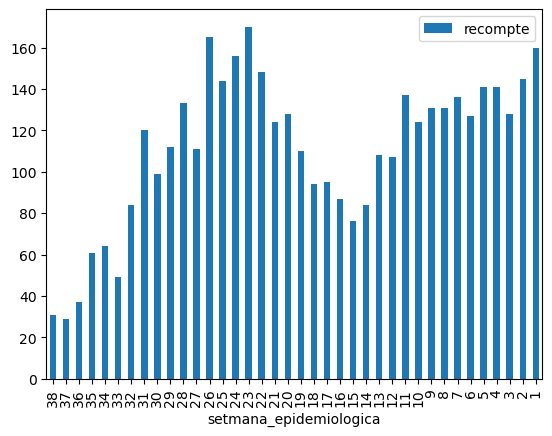

In [63]:
df_q5: pd.DataFrame = copy.deepcopy(df_seqvariants_covid)

mask_question5 = (df_q5['nom_regio'] == 'BARCELONA')
df_q5 = df_q5.loc[mask_question5]

df_q5.drop(columns=['nom_regio','nom_ambit'],inplace=True)

# Per a fer el gràfic, necessitarem només les columnes de:
# df_q5_plot = pd.DataFrame = df_q5.loc[:, ["data_inici", "recompte"]].groupby("data_inici").count().sort_values(by='data_inici', ascending=False)
df_q5_plot = pd.DataFrame = df_q5.loc[:, ["setmana_epidemiologica", "recompte"]].groupby("setmana_epidemiologica").count().sort_values(by='setmana_epidemiologica', ascending=False)

display(df_q5_plot)

df_q5_plot.plot(kind="bar")


#### Ara, fem el rànking dels casos de la regió sanitària de Barcelona, agrupats per setmana, durant el 2022. 

,recompte
data_inici,
2022-09-19,31
2022-09-12,29
2022-09-05,37
2022-08-29,61
2022-08-22,64
2022-08-15,49
2022-08-08,84
2022-08-01,120
2022-07-25,99


<AxesSubplot: xlabel='data_inici'>

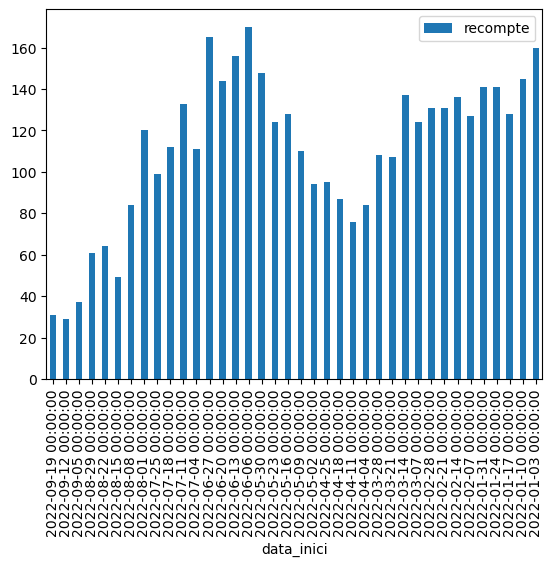

In [64]:
# Pendent millora, que surti només dd/mm/aaaa
# df_q5['data_inici'] = pd.to_datetime(df_q5['data_inici'])
# df_q5['data_inici2'] = df_q5['data_inici'].dt.date
# df_q5.drop(columns=['data_inici'])

df_q5_plot = pd.DataFrame = df_q5.loc[:, ["data_inici", "recompte"]] \
.groupby("data_inici") \
.count() \
.sort_values(by="recompte", ascending=False) 

display(df_q5_plot)

df_q5_plot.plot(kind="bar")

## Pregunta 6)  Consulta que crei almenys una columna calculada.
1. És a dir, que la consulta crei un nou camp depenent d’un altre camp, o calculat a partir d’altres columnes.
2. Exemples: 
    a) camp Apte/NoApte depenent de les notes d’alumnes
    b) càlcul imc a partir del pes i l’alçada.

## Pregunta 7)  Consulta amb dades agrupades per un camp de tipus categòric.
1. Si no teniu un camp que es pugui convertir a tipus categòric, haureu de crear-ne un. 
2. També heu de mostrar un gràfic de totes les categories.



## Pregunta 8)  Consulta amb dades agrupades per data.
1. És a dir, que si les dades no estan agrupades les haureu d’agrupar per data; ja sigui per any, per mes o per dia.
2. També heu de mostrar un gràfic.

       
## Pregunta 9)  Separació i fusió de datasets.
Tria una de les 2 operacions:
a) Fes una còpia del dataSet, aconsegueix crear 2 dataSet amb camps i files separats però que comparteixin un camp comú, i després fes el merge.
b) Si el teu dataSet està desactualitzat o falten dades d'alguns anys i les trobes dades per altres fonts, crea un nou conjunt de dades amb algunes files i/o alguna columna nova. Finalment, fes el merge.